## Chapter 2

Инициализация интерактвиного сеанса Tensorflow

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.6.2'

In [4]:
#from version v2.x you should use this for activate version
import tensorflow.compat.v1 as tfc

In [141]:
sess = tfc.InteractiveSession()

/home/nina/.local/lib/python3.6/site-packages/tensorflow/python/client/session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [10]:
# создание тензора нулей
a = tf.zeros(2)

In [16]:
# возрат значения
print(a.numpy())

[0. 0.]


In [17]:
# выведение матрицы с единицами
b = tf.ones((2, 2, 2))
b.numpy()

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]], dtype=float32)

In [18]:
# заполнение тензоров произвольными значениями
c = tf.fill((2, 2), value=5.)
c.numpy()

array([[5., 5.],
       [5., 5.]], dtype=float32)

In [19]:
# создание константных тензоров (не должны изменяться во время выполнения программ)
a = tf.constant(3)
a.numpy()

3

In [22]:
# отбор случайных значений для тензора из нормального распределения
b = tf.random.normal((2, 2), mean=0, stddev=1)
b.numpy()

array([[-0.8828074,  1.5494524],
       [ 0.3921401, -1.229013 ]], dtype=float32)

In [23]:
# отбор случайных значений для тензора из равномерного распределения
a = tf.random.uniform((2, 2), minval=-2, maxval=2)
a.numpy()

array([[-0.22129059,  0.85585594],
       [-0.754931  ,  1.1418471 ]], dtype=float32)

In [24]:
# сложение тензоров
c = tf.ones((2, 2))
d = tf.ones((2, 2))
e = c + d
e.numpy

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>>

In [25]:
f = 2 * e
f.numpy()

array([[4., 4.],
       [4., 4.]], dtype=float32)

In [27]:
# поэлементное умножение (при умножении тензоров мы получаем не матричное умножение, а поэлементное)
c = tf.fill((2, 2), 2.)
d = tf.fill((2, 2), 7.)
e = c * d
e.numpy()

array([[14., 14.],
       [14., 14.]], dtype=float32)

In [32]:
# создание единичной матрицы - это квадратная матрица, элементы которой равны 0 везде, кроме главной диагонали, где они равны 1
tf.eye(4).numpy()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [36]:
# tf.range(начало, граница(не включительно), дельта)
r = tf.range(1, 5, 1)
r.numpy()

array([1, 2, 3, 4], dtype=int32)

In [35]:
# диагональная матрица - так же являются ненулевыми по диагонали, но по диагонали могут быть произвольные значения
d = tf.linalg.diag(r)
d.numpy()

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int32)

In [38]:
# получение транспонированной матрицы
a = tf.ones((2, 3))
a.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [39]:
at = tf.transpose(a)
at.numpy()

array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)

In [40]:
# выполнение матричного умножения
b = tf.ones((3, 4))
c = tf.matmul(a, b)
c.numpy()

array([[3., 3., 3., 3.],
       [3., 3., 3., 3.]], dtype=float32)

In [41]:
# смена типа данных тензора
a = tf.ones((2, 2), dtype=tf.int32)
a.numpy()

array([[1, 1],
       [1, 1]], dtype=int32)

In [45]:
b = tf.cast(a, tf.float32)
b.numpy()

array([[1., 1.],
       [1., 1.]], dtype=float32)

In [46]:
# манипуляция с формами тензоров. reshape - позволяет конвертировать тензоры в тензоры другой формы
a = tf.ones(8)
a.numpy()

array([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [48]:
b = tf.reshape(a, (4, 2))
b.numpy()

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)

In [49]:
c = tf.reshape(a, (2, 2, 2))
c.numpy()

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]], dtype=float32)

In [50]:
# получение формы тензора
a = tf.ones(2)
a.get_shape()

TensorShape([2])

In [53]:
# expand_dims добавляет в тензор новую размерность размера 1 
b = tf.expand_dims(a, 0)
b.get_shape()

TensorShape([1, 2])

In [54]:
b.numpy()

array([[1., 1.]], dtype=float32)

In [55]:
c = tf.expand_dims(a, 1)
c.get_shape()

TensorShape([2, 1])

In [56]:
c.numpy()

array([[1.],
       [1.]], dtype=float32)

In [57]:
# squeeze удаляет из тензора все размерности размера 1, превращая например векторк-строку 2 ранга в вектор 1-го ранга
d = tf.squeeze(b)
d.get_shape()

TensorShape([2])

In [59]:
d.numpy()

array([1., 1.], dtype=float32)

In [60]:
# примеры транслирования - добавления к матрицам тензорной системы вектора разного размера
a = tf.ones((2, 2))
b = tf.range(0, 2, 1, dtype=tf.float32) 
# если не задать явно тип, то будет ошибка, т.к. tensorflow не выполняет неявное приведение типов
b.numpy()

array([0., 1.], dtype=float32)

In [61]:
c = a + b
c.numpy()

array([[1., 2.],
       [1., 2.]], dtype=float32)

In [62]:
# TensorFlow выполняет только декларативное сложение
a = tf.constant(3)
b = tf.constant(4)
c = a + b
c

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [63]:
c.numpy()

7

In [80]:
# обработка сеансов явным образом
tf.compat.v1.disable_eager_execution() # need to disable eager in TF2.x
sess = tfc.Session()
a = tf.ones((2, 2))
b = tf.matmul(a, a)

In [81]:
print(sess.run(b))

[[2. 2.]
 [2. 2.]]


In [91]:
# объекты-переменные Variable служат контейнером для тензоров
a = tf.Variable(tf.ones((2, 2)))
a

<tf.Variable 'Variable_4:0' shape=(2, 2) dtype=float32>

In [98]:
# tf.global_variables_initializer() - инициализирует все переменные для расчета. более не используется
init_op = tf.local_variables_initializer()
sess.run(init_op)
print(sess.run(a))

AttributeError: module 'tensorflow' has no attribute 'local_variables_initializer'

In [99]:
# при помощи функции assign мы можем обновить значение существующей переменной
tf.compat.v1.disable_eager_execution() # need to disable eager in TF2.x
sess = tfc.Session()
sess.run(a.assign(tf.zeros((2, 2))))
sess.run(a)

array([[0., 0.],
       [0., 0.]], dtype=float32)

## Chapter 3

In [ ]:
# игрушечный набор регрессионных данных
import numpy as np
np.random.seed(456)
import  tensorflow as tf
tf.random.set_seed(456)
from matplotlib import rc
rc('text', usetex=True)

In [114]:
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

In [105]:
# функции ошибок
def pearson_r2_score(y, y_pred):
 # """Computes Pearson R^2 (square of Pearson correlation)."""
  return pearsonr(y, y_pred)[0]**2

def rms_score(y_true, y_pred):
# """Computes RMS error."""
  return np.sqrt(mean_squared_error(y_true, y_pred))

In [236]:
# Generate synthetic data
N = 3
#N = 100
w_true = 5
b_true = 2
noise_scale = .1
x_np = np.random.rand(N, 1)
noise = np.random.normal(scale=noise_scale, size=(N, 1))
# Convert shape of y_np to (N,)
y_np = np.reshape(w_true * x_np  + b_true + noise, (-1))

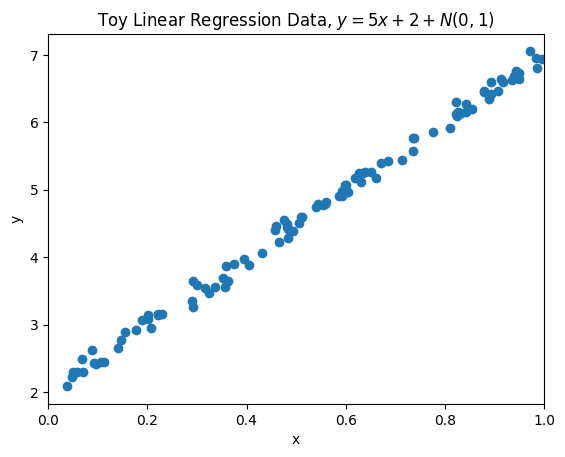

In [229]:
# Save image of the data distribution
plt.scatter(x_np, y_np);
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 1)
plt.title("Toy Linear Regression Data, $y = 5x + 2 + N(0, 1)$")
plt.savefig("lr_data.png");

In [240]:
# тренировка линейной регрессионной модели
# Generate tensorflow graph
# placeholders - (заполнитель) это способ ввода информации в вычислительный граф

import tensorflow.compat.v1 as tfc
graph = tf.Graph()
with graph.as_default():
    with tf.name_scope('placeholders'):
        x = tfc.placeholder(tf.float32, (3, 1))
        y = tfc.placeholder(tf.float32, (3, ))
# name_scope (область имен) - представляет собой механизм определения областей видимости для управления коллекциями переменных
# обратите внимание, что x - это скаляр, поэтому W - это одиночный заучиваемый вес
    with tf.name_scope('weights'):
        W = tf.Variable(tfc.random_normal((1, 1)))
        b = tf.Variable(tfc.random_normal((1,)))
    with tf.name_scope('prediction'):
        y_pred = tf.matmul(x,W) + b
    with tf.name_scope('loss'):
        l = tf.reduce_sum((y-y_pred)**2)
    #Добавить оптимизацию тренировки
    with tf.name_scope('optim'):
        #Задать скорость заучивания .001, как рекомендовано выше.
        train_op = tfc.train.AdamOptimizer(.001).minimize(l)
    with tf.name_scope('summaries'):
        #Запись сводки о переменных(скалярных величинах) в заданный каталог журналов
        # добавление сводного отчета для функции потерь
        tfc.summary.scalar('loss', l)
        #Объединение нескольких сводок в одну
        merged = tfc.summary.merge_all()

    train_writer = tfc.summary.FileWriter('/tmp/lr-train', graph)

    n_steps = 8000

    with tfc.Session() as sess:
        sess.run(tfc.global_variables_initializer())
        
        #Натренировать модель
        for i in range(n_steps):
            feed_dict1 = {x: [[1.], [2.], [3.]], y: [2., 3., 4.]}
            _, summary, loss = sess.run([train_op, merged, l], feed_dict=feed_dict1)
            train_writer.add_summary(summary, i)

            # print epoch and loss
            if i % 100 == 0:
                print(f'Epoch: {i}'.ljust(13) + f'loss: {loss:.4f}'.ljust(16))
            
              # Get weights
            w_final, b_final = sess.run([W, b])

              # Make Predictions
            y_pred_np = sess.run(y_pred, feed_dict=feed_dict1)

In [232]:
#y_pred_np = np.reshape(y_pred_np, -1)

In [246]:
# квадратичный коэффициент корреляции Пирсона  - это мера корреляции между двумя переменными, которая принимает значение от +1 до 0
# при этом +1 указывает на идеальную корреляцию, а 0 - на отсутствие корреляции
y_pred_np = np.reshape(y_pred_np, -1)
r2 = pearson_r2_score(y_np, y_pred_np)
print("Pearson R^2: %f" % r2)

Pearson R^2: 0.182427


In [243]:
# RMSE - является мерой усредненной разницы между предсказанными значениями и истинными
rms = rms_score(y_np, y_pred_np)
print("RMS: %f" % rms)

RMS: 0.628583


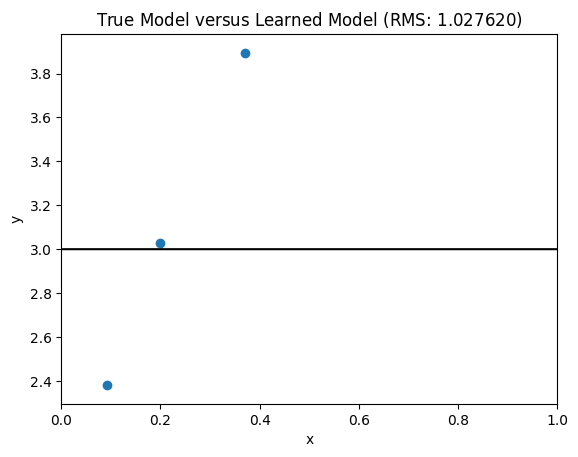

In [244]:

# Clear figure
plt.clf()
plt.xlabel("Y-true")
plt.ylabel("Y-pred")
plt.title("Predicted versus True values "
          r"(Pearson $R^2$: $0.994$)")
plt.scatter(y_np, y_pred_np)
plt.savefig("lr_pred.png")

# Now draw with learned regression line
plt.clf()
plt.xlabel("x")
plt.ylabel("y")
plt.title("True Model versus Learned Model "
          r"(RMS: $1.027620$)")
plt.xlim(0, 1)
plt.scatter(x_np, y_np)
x_left = 0
y_left = w_final[0]*x_left + b_final
x_right = 1
y_right = w_final[0]*x_right + b_final
plt.plot([x_left, x_right], [y_left, y_right], color='k')
plt.savefig("lr_learned.png")


In [ ]:
# пример логистической регрессии
import numpy as np
np.random.seed(456)
import tensorflow as tf
tf.set_random_seed(456)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from scipy.special import logit

# Generate synthetic data
N = 100
# Zeros form a Gaussian centered at (-1, -1)
x_zeros = np.random.multivariate_normal(
    mean=np.array((-1, -1)), cov=.1*np.eye(2), size=(N//2,))
y_zeros = np.zeros((N//2,))
# Ones form a Gaussian centered at (1, 1)
x_ones = np.random.multivariate_normal(
    mean=np.array((1, 1)), cov=.1*np.eye(2), size=(N//2,))
y_ones = np.ones((N//2,))

x_np = np.vstack([x_zeros, x_ones])
y_np = np.concatenate([y_zeros, y_ones])

# Save image of the data distribution
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Toy Logistic Regression Data")

# Plot Zeros
plt.scatter(x_zeros[:, 0], x_zeros[:, 1], color="blue")
plt.scatter(x_ones[:, 0], x_ones[:, 1], color="red")
plt.savefig("logistic_data.png")

# Generate tensorflow graph
with tf.name_scope("placeholders"):
  x = tf.placeholder(tf.float32, (N, 2))
  y = tf.placeholder(tf.float32, (N,))
with tf.name_scope("weights"):
  W = tf.Variable(tf.random_normal((2, 1)))
  b = tf.Variable(tf.random_normal((1,)))
with tf.name_scope("prediction"):
  y_logit = tf.squeeze(tf.matmul(x, W) + b)
  # the sigmoid gives the class probability of 1
  y_one_prob = tf.sigmoid(y_logit)
  # Rounding P(y=1) will give the correct prediction.
  y_pred = tf.round(y_one_prob)

with tf.name_scope("loss"):
  # Compute the cross-entropy term for each datapoint
  entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y)
  # Sum all contributions
  l = tf.reduce_sum(entropy)
with tf.name_scope("optim"):
  train_op = tf.train.AdamOptimizer(.01).minimize(l)

with tf.name_scope("summaries"):
  tf.summary.scalar("loss", l)
  merged = tf.summary.merge_all()

train_writer = tf.summary.FileWriter('/tmp/logistic-train', tf.get_default_graph())

n_steps = 1000
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  # Train model
  for i in range(n_steps):
    feed_dict = {x: x_np, y: y_np}
    _, summary, loss = sess.run([train_op, merged, l], feed_dict=feed_dict)
    print("loss: %f" % loss)
    train_writer.add_summary(summary, i)

  # Get weights
  w_final, b_final = sess.run([W, b])

  # Make Predictions
  y_pred_np = sess.run(y_pred, feed_dict={x: x_np})

score = accuracy_score(y_np, y_pred_np)
print("Classification Accuracy: %f" % score)

plt.clf()
# Save image of the data distribution
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Learned Model (Classification Accuracy: 1.00)")
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Plot Zeros
plt.scatter(x_zeros[:, 0], x_zeros[:, 1], color="blue")
plt.scatter(x_ones[:, 0], x_ones[:, 1], color="red")

x_left = -2
y_left = (1./w_final[1]) * (-b_final + logit(.5) - w_final[0]*x_left)

x_right = 2
y_right = (1./w_final[1]) * (-b_final + logit(.5) - w_final[0]*x_right)
plt.plot([x_left, x_right], [y_left, y_right], color='k')

plt.savefig("logistic_pred.png")